**DataSet Review Trip Advisor:** <br>
https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

In [1]:
#pip install tensorflow

In [2]:
import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
#importing dataset
df=pd.read_csv("tripadvisor_hotel_reviews.csv", delimiter=',', quotechar='"', on_bad_lines='skip')
print (df.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [4]:
#sentiment count
print("Total :\n",df['Rating'].value_counts())
# stars
#5    9045
#1    6039
#4    2184
#3    1793
#2    1421

Total :
 Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64


In [5]:
review = []

sentences = list (df['Review'])
for sen in sentences:
 review.append(sen)

In [6]:
from tensorflow.keras.utils import to_categorical
labels = df['Rating']
labels = df['Rating'] - 1
#labels = to_categorical(df['stars'] - 1, num_classes=5)

In [7]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

In [8]:
# Parameters
vocab_size = 1000
max_length = 120
embedding_dim = 32
trunc_type="post"
oov_tok = "<00V>"

Tokenización y acolchado Secuencias

In [9]:
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Initialize the Tokenizer class
tokenizer = Tokenizer (num_words = vocab_size, oov_token=oov_tok)
# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences (sequences, maxlen=max_length, truncating=trunc_type)
# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

Construcción del modelo

In [10]:
# Build the model
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64,return_sequences=True),
    keras.layers.LSTM(32,return_sequences=True),
    keras.layers.LSTM(16),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Resumen del modelo

In [11]:
# Setup the training parameters
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
from tensorflow.keras.optimizers import SGD
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Construcción y entrenamiento del modelo

Epoch 1/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 96s 172ms/step - accuracy: 0.4452 - loss: 1.3799 - val_accuracy: 0.4450 - val_loss: 1.3524
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 151s 190ms/step - accuracy: 0.4584 - loss: 1.2564 - val_accuracy: 0.4979 - val_loss: 1.1207
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 136s 179ms/step - accuracy: 0.5244 - loss: 1.0270 - val_accuracy: 0.5604 - val_loss: 0.9492
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 141s 177ms/step - accuracy: 0.5677 - loss: 0.9467 - val_accuracy: 0.5814 - val_loss: 0.9427
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 147s 186ms/step - accuracy: 0.6210 - loss: 0.8611 - val_accuracy: 0.5865 - val_loss: 0.9151
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 94s 183ms/step - accuracy: 0.6372 - loss: 0.8279 - val_accuracy: 0.6038 - val_loss: 0.9028
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 97s 190ms/step - accuracy: 0.6485 - loss: 0.8157 - val_accuracy: 0.6021 - val_loss: 0.9040
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 137s 180ms/step - accuracy: 0.6577 - lo

<Axes: >

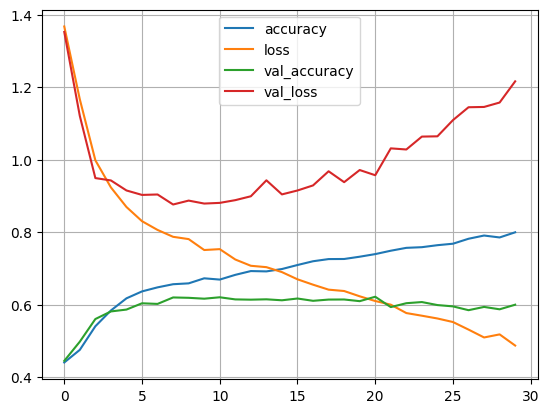

In [12]:
num_epochs = 30
# Train the model
history = model. fit(padded,train_labels,epochs=num_epochs,validation_data=(test_padded, test_labels))
# Graficar el historial de entrenamiento:
pd.DataFrame(history. history) .plot(grid=True)

129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step
Accuracy: 0.60
Precision: 0.60
Recall: 0.60
F1-Score: 0.60
Confusion Matrix:
[[ 172   80   14   13    9]
 [  61  137   68   45   21]
 [  15   80  162  156   26]
 [   2   28  159  583  444]
 [   4   26   49  340 1405]]


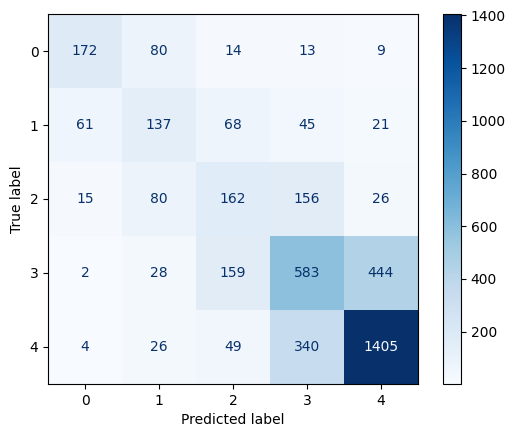

In [13]:
#Métricas
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score,recall_score

# Obtener las predicciones del modelo sobre el conjunto de prueba
predictions = model.predict(test_padded)
#predicted_labels = (predictions > 0.5).astype(int).flatten()[:len(test_labels)] #Binaria
predicted_labels = np.argmax(predictions, axis=1) #Multiclase


# Calcular Métricas
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels,predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels,average='weighted')

# Imprimir las métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)
# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step


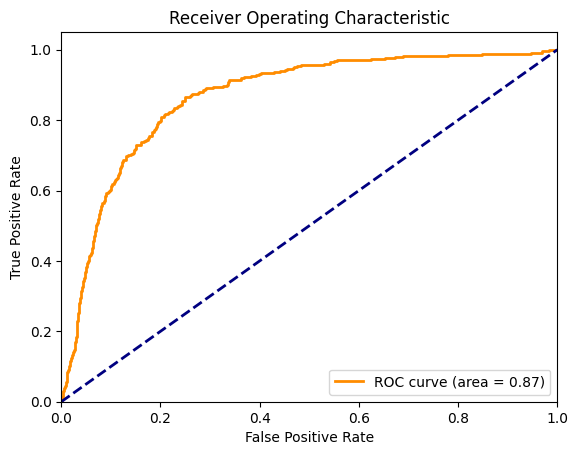

AUC: 0.87


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de las predicciones multiclase
y_prob = model.predict(test_padded)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step
Dimensiones de test_labels: (4099,)
Dimensiones de y_pred: (4099,)


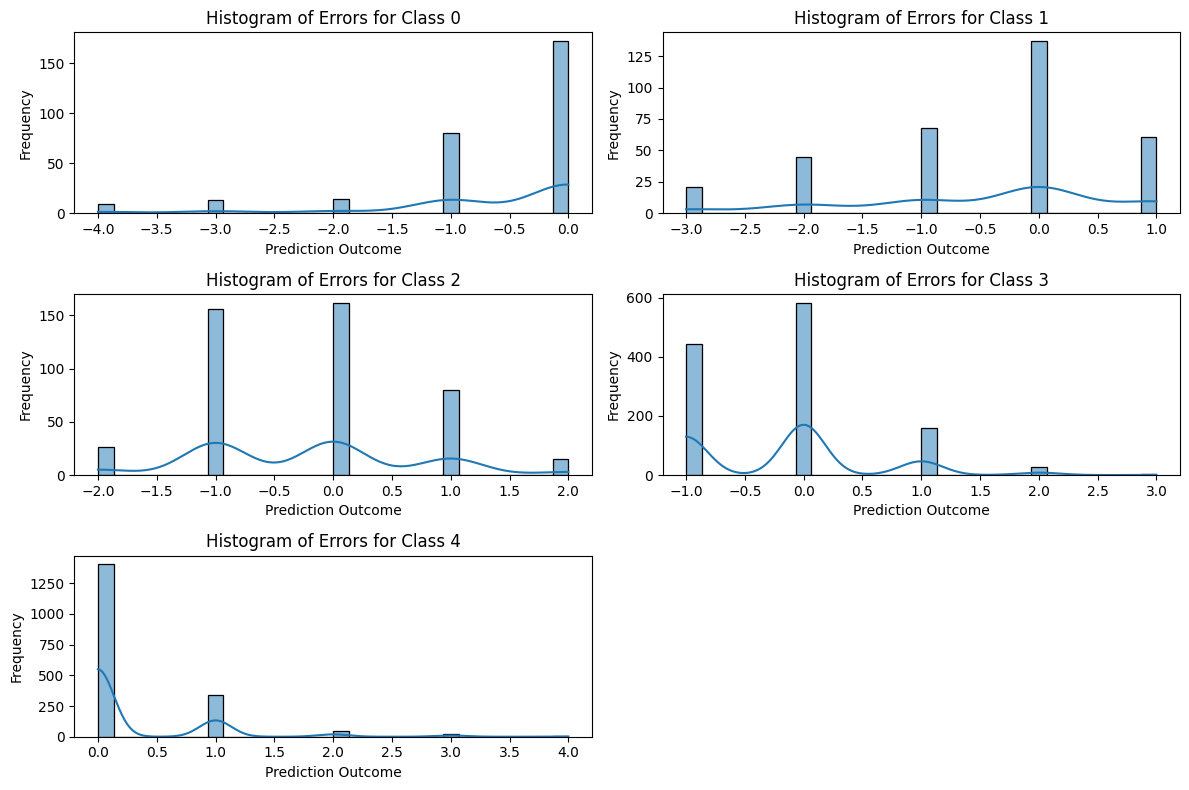

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo
y_prob = model.predict(test_padded)  # Esto debería ser de tamaño (num_samples, num_classes)

# Convertir probabilidades a etiquetas de clase
y_pred = np.argmax(y_prob, axis=1)

# Asegúrate de que test_labels también esté en formato unidimensional
test_labels = np.array(test_labels).flatten()

# Verificar que las dimensiones coincidan
print(f"Dimensiones de test_labels: {test_labels.shape}")
print(f"Dimensiones de y_pred: {y_pred.shape}")

# Calcular los errores para cada clase
num_classes = y_prob.shape[1]
errors_by_class = {i: test_labels[test_labels == i] - y_pred[test_labels == i] for i in range(num_classes)}

# Crear histogramas de errores para cada clase
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    plt.subplot(3, 2, i + 1)  # Ajusta el número de subgráficas según el número de clases
    sns.histplot(errors_by_class[i], kde=True, bins=30)
    plt.xlabel('Prediction Outcome')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Errors for Class {i}')

plt.tight_layout()
plt.show()

